In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

x_train = pd.read_csv('X_train_NHkHMNU.csv')
y_train = pd.read_csv('y_train_ZAN5mwg.csv')
x_test =  pd.read_csv('X_test_final.csv')

pd.set_option('display.max_columns', None)
from sklearn.impute import KNNImputer

In [ ]:
def preprocessing(dataset):

    dataset = pd.get_dummies(dataset, columns=['COUNTRY'])
    placeholder_value = -9999
    dataset_filled = dataset.fillna(placeholder_value)
    columns_to_impute = dataset_filled.columns
    imputer = SimpleImputer(strategy='median')
    dataset_filled.replace(placeholder_value, float('nan'), inplace=True)
    return pd.DataFrame(imputer.fit_transform(dataset_filled), columns=columns_to_impute)

x_train_imputed = preprocessing(x_train)
x_test_imputed = preprocessing(x_test)


x_train_imputed

,ID,DAY_ID,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,DE_GAS,FR_GAS,DE_COAL,FR_COAL,DE_HYDRO,FR_HYDRO,DE_NUCLEAR,FR_NUCLEAR,DE_SOLAR,FR_SOLAR,DE_WINDPOW,FR_WINDPOW,DE_LIGNITE,DE_RESIDUAL_LOAD,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,COUNTRY_DE,COUNTRY_FR
0,1054.0,206.0,0.210099,-0.427458,-0.606523,0.606523,-0.306899,0.692860,0.306899,-0.692860,0.441238,-0.213766,0.740627,0.288782,2.209047,0.207838,0.709614,-0.190463,0.101766,1.248911,-0.573370,-0.269460,0.870344,0.626666,-0.444661,-0.172680,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445,0.0,1.0
1,2049.0,501.0,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,1.130838,0.174773,0.426940,-0.170392,-0.762153,0.187964,-0.807112,-1.882740,-2.185961,1.987428,3.237380,-0.035514,-0.107350,-0.194308,-0.395469,-1.183194,-1.240300,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365,0.0,1.0
2,1924.0,687.0,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,1.682587,2.351913,2.122241,1.572267,0.777053,-0.108578,0.779142,-1.897109,0.735137,-1.115583,-0.371039,-0.298755,-0.141239,0.428272,1.336625,1.947273,-0.480700,-0.313338,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952,0.0,1.0
3,297.0,720.0,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,-0.563230,0.487818,0.194659,-1.473817,-0.786025,-0.368417,1.320483,-0.205547,-1.589554,1.751523,0.562944,-0.010090,0.366885,-2.330557,-1.191889,-0.976974,-1.114838,-0.507570,-0.499409,-0.236249,0.350938,-0.417514,0.911652,-0.296168,1.073948,1.0,0.0
4,1101.0,818.0,0.143807,-0.617038,-0.924990,0.924990,-0.306899,0.990324,0.306899,-0.990324,0.238693,-0.240862,1.003734,-0.274975,-0.230179,-0.795983,-0.005581,0.176935,0.693543,0.723587,-0.774941,-0.564498,0.691040,0.571613,-0.526267,-0.541465,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,459.0,809.0,1.529204,1.106682,-1.855327,1.855327,-0.218658,1.450426,0.218658,-1.450426,1.810665,1.388269,0.359723,-0.294001,-0.470809,1.708814,0.207266,0.712492,-1.325306,-0.855249,-0.057214,2.968535,0.790548,1.547782,0.509514,-0.274901,-0.228147,-0.261571,-0.229031,-0.026306,-0.020889,0.876984,0.819520,1.320373,1.0,0.0
1490,1674.0,887.0,1.618582,1.752840,0.611392,-0.611392,0.449153,-0.152146,-0.449153,0.152146,1.972779,1.558300,0.561356,0.230746,-0.341147,2.957114,0.217922,0.926279,-1.222781,-0.923261,0.198857,0.789618,0.917482,1.358927,1.666252,-0.274901,-0.228147,-0.261571,-0.229031,-0.026306,-0.020889,0.932633,-0.085690,0.356356,0.0,1.0
1491,748.0,1083.0,0.856399,0.489199,-0.255778,0.255778,-1.531544,-0.829568,1.531544,0.829568,2.108764,1.866399,1.072553,-0.180117,0.037892,0.277630,-1.833866,-0.964588,-0.626731,0.196789,-0.981718,0.303324,0.211422,1.493870,0.358120,0.207905,0.404763,-0.594595,0.894011,0.256338,0.402316,-1.112899,-0.237835,0.067152,1.0,0.0
1492,1454.0,1133.0,0.560689,-0.343777,-0.830239,0.830239,-0.304856,1.210230,0.304856,-1.210230,-0.003973,0.869742,-0.436935,-0.772801,-0.288150,1.447245,0.107706,-0.196405,0.619473,0.918251,0.378080,-0.973969,-0.828580,-0.137667,-0.184862,-0.682815,-0.390304,-0.972088,-1.501930,1.215528,1.338708,0.962812,-5.392852,-0.843812,0.0,1.0


In [ ]:
x_train_imputed['FR_WIND_SQR'] = np.sqrt(np.maximum(0, x_train_imputed['FR_WINDPOW']))
x_train_imputed['DE_WIND_SQR'] = np.sqrt(np.maximum(0, x_train_imputed['DE_WINDPOW']))

x_train_imputed['DE_NET_EXPORT_cumsum'] = x_train_imputed.groupby('DAY_ID')['DE_NET_EXPORT'].cumsum()
x_train_imputed['FR_NET_EXPORT_cumsum'] = x_train_imputed.groupby('DAY_ID')['FR_NET_EXPORT'].cumsum()

x_train_imputed['FR_CONSUMPTION_cumsum'] = x_train_imputed.groupby('DAY_ID')['FR_CONSUMPTION'].cumsum()
x_train_imputed['DE_CONSUMPTION_cumsum'] = x_train_imputed.groupby('DAY_ID')['DE_CONSUMPTION'].cumsum()

x_train_imputed['FR_RESIDUAL_LOAD_cumsum'] = x_train_imputed.groupby('DAY_ID')['FR_RESIDUAL_LOAD'].cumsum()
x_train_imputed['DE_RESIDUAL_LOAD_cumsum'] = x_train_imputed.groupby('DAY_ID')['DE_RESIDUAL_LOAD'].cumsum()

x_train_imputed['GAS_RET_cumsum'] = x_train_imputed.groupby('DAY_ID')['GAS_RET'].cumsum()
x_train_imputed['COAL_RET_cumsum'] = x_train_imputed.groupby('DAY_ID')['COAL_RET'].cumsum()
x_train_imputed['CARBON_RET_cumsum'] = x_train_imputed.groupby('DAY_ID')['COAL_RET'].cumsum()


# Cube root for rain variables
x_train_imputed['FR_RAIN_CUBE'] = np.cbrt(x_train_imputed['FR_RAIN'])
x_train_imputed['DE_RAIN_CUBE'] = np.cbrt(x_train_imputed['DE_RAIN'])

x_train_imputed['FR_NON_RENEW_CONSUMPTION'] = x_train_imputed['FR_RESIDUAL_LOAD']/x_train_imputed['FR_CONSUMPTION']
x_train_imputed['DE_NON_RENEW_CONSUMPTION'] = x_train_imputed['DE_RESIDUAL_LOAD']/x_train_imputed['DE_CONSUMPTION']

x_train_imputed['FR_PERC_ELEC_TO_DE'] = x_train_imputed['FR_DE_EXCHANGE']/x_train_imputed['FR_NET_EXPORT']
x_train_imputed['DE_PERC_ELEC_TO_FR'] = x_train_imputed['DE_FR_EXCHANGE']/x_train_imputed['DE_NET_EXPORT']

x_train_imputed['FR_NON_RENEWABLE'] = x_train_imputed['FR_COAL']+ x_train_imputed['FR_GAS'] + x_train_imputed['FR_NUCLEAR']
x_train_imputed['FR_RENEWABLE'] = x_train_imputed['FR_HYDRO']+ x_train_imputed['FR_SOLAR'] + x_train_imputed['FR_WINDPOW']

x_train_imputed['DE_NON_RENEWABLE'] = x_train_imputed['DE_COAL']+ x_train_imputed['DE_GAS'] + x_train_imputed['DE_NUCLEAR'] + x_train_imputed['DE_LIGNITE']
x_train_imputed['DE_RENEWABLE'] = x_train_imputed['DE_HYDRO']+ x_train_imputed['DE_SOLAR'] + x_train_imputed['DE_WINDPOW']


x_train_imputed['FR_PROD-CONSUMPTION-EXPORTS'] = x_train_imputed['FR_NON_RENEWABLE']+x_train_imputed['FR_RENEWABLE'] - x_train_imputed['FR_CONSUMPTION']- x_train_imputed['FR_NET_EXPORT']
x_train_imputed['DE_PROD-CONSUMPTION-EXPORTS'] =  x_train_imputed['DE_NON_RENEWABLE']+x_train_imputed['DE_RENEWABLE'] - x_train_imputed['DE_CONSUMPTION']- x_train_imputed['DE_NET_EXPORT']

x_train_imputed['FR_RESIDUAL_LOAD_lag'] = x_train_imputed['FR_RESIDUAL_LOAD'].shift(1)
x_train_imputed['DE_RESIDUAL_LOAD_lag'] = x_train_imputed['DE_RESIDUAL_LOAD'].shift(1)

mean_fr_residual_load = x_train_imputed['FR_RESIDUAL_LOAD'].mean()
x_train_imputed['FR_RESIDUAL_LOAD_lag'] = x_train_imputed['FR_RESIDUAL_LOAD_lag'].fillna(mean_fr_residual_load)

mean_de_residual_load = x_train_imputed['DE_RESIDUAL_LOAD'].mean()
x_train_imputed['DE_RESIDUAL_LOAD_lag'] = x_train_imputed['DE_RESIDUAL_LOAD_lag'].fillna(mean_de_residual_load)

x_train_imputed['FR_WIND_lag'] = x_train_imputed['FR_WIND'].shift(1)
x_train_imputed['DE_WIND_lag'] = x_train_imputed['DE_WIND'].shift(1)

mean_fr_wind = x_train_imputed['FR_WIND'].mean()
x_train_imputed['FR_WIND_lag'] = x_train_imputed['FR_WIND_lag'].fillna(mean_fr_wind)

mean_de_wind = x_train_imputed['DE_WIND'].mean()
x_train_imputed['DE_RESIDUAL_LOAD_lag'] = x_train_imputed['DE_WIND_lag'].fillna(mean_de_wind)

x_train_imputed['FR_CONSUMPTION_lag'] = x_train_imputed['FR_CONSUMPTION'].shift(1)
x_train_imputed['DE_CONSUMPTION_lag'] = x_train_imputed['DE_CONSUMPTION'].shift(1)

mean_fr_cons = x_train_imputed['FR_CONSUMPTION'].mean()
x_train_imputed['FR_CONSUMPTION_lag'] = x_train_imputed['FR_CONSUMPTION_lag'].fillna(mean_fr_cons)

mean_de_cons = x_train_imputed['DE_CONSUMPTION'].mean()
x_train_imputed['DE_CONSUMPTION_lag'] = x_train_imputed['DE_CONSUMPTION_lag'].fillna(mean_de_cons)


x_train_imputed['FR_WIND_lag'] = x_train_imputed['FR_WIND'].shift(1)
x_train_imputed['DE_WIND_lag'] = x_train_imputed['DE_WIND'].shift(1)

mean_fr_wind = x_train_imputed['FR_WIND'].mean()
x_train_imputed['FR_WIND_lag'] = x_train_imputed['FR_WIND_lag'].fillna(mean_fr_wind)

merge_df = pd.merge(x_train_imputed, y_train, on='ID')

merge_df['TARGET_lag'] = merge_df['TARGET'].shift(1)

mean_target= merge_df['TARGET'].mean()
merge_df['TARGET_lag']=merge_df['TARGET_lag'].fillna(mean_fr_wind)

merge_df.drop('TARGET', axis = 1, inplace = True)

x_train_imputed = merge_df

x_train_imputed.drop(['ID', 'DE_NET_IMPORT', 'FR_NET_IMPORT', 'DE_NET_EXPORT', 'FR_NET_EXPORT'], axis = 1, inplace = True)

y_train.drop('ID', axis = 1, inplace = True)





In [ ]:
nan_columns = x_train_imputed.columns[x_train_imputed.isnull().any()].tolist()
print(f"Columns with NaN values: {nan_columns}")
for column in nan_columns:
    x_train_imputed[column].fillna(x_train_imputed[column].median(), inplace=True)

Columns with NaN values: ['DE_WIND_lag']


In [ ]:
assert not x_train_imputed.isnull().values.any(), "NaN values present in training data"
assert not x_test_imputed.isnull().values.any(), "NaN values present in test data"

In [ ]:
scaler = StandardScaler()
x_train_scaled= scaler.fit_transform(x_train_imputed)
x_train_imputed = pd.DataFrame(x_train_scaled, columns=x_train_imputed.columns)

In [ ]:
ada_reg = AdaBoostRegressor(random_state=42)
mse_valid = cross_val_score(ada_reg, x_train_imputed, y_train.values.ravel(), scoring='neg_mean_squared_error', cv=5)
print(f'Average MSE: {-np.mean(mse_valid)}')
mae_scores = cross_val_score(ada_reg, x_train_imputed, y_train.values.ravel(), scoring='neg_mean_absolute_error', cv=5)
print(f'Average MAE: {-np.mean(mae_scores)}')


Average MSE: 1.3402551934762912
Average MAE: 0.7575956537948338


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature Importances (Sorted by Importance):
                     Feature  Importance
45  DE_NON_RENEW_CONSUMPTION    0.102835
25                   FR_TEMP    0.075656
54      FR_RESIDUAL_LOAD_lag    0.058094
16                FR_WINDPOW    0.055934
0                     DAY_ID    0.049756
..                       ...         ...
11                DE_NUCLEAR    0.000350
19          FR_RESIDUAL_LOAD    0.000000
50          DE_NON_RENEWABLE    0.000000
34      FR_NET_EXPORT_cumsum    0.000000
30                COUNTRY_FR    0.000000

[61 rows x 2 columns]


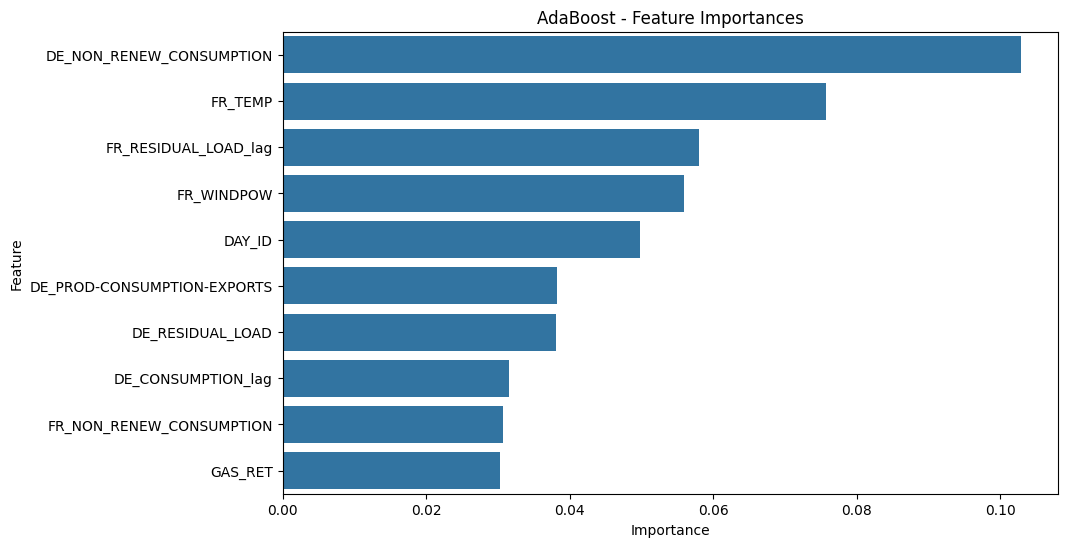

In [ ]:
ada_reg.fit(x_train_imputed, y_train)
feature_importances = ada_reg.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x_train_imputed.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importances (Sorted by Importance):")
print(feature_importance_df)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('AdaBoost - Feature Importances')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

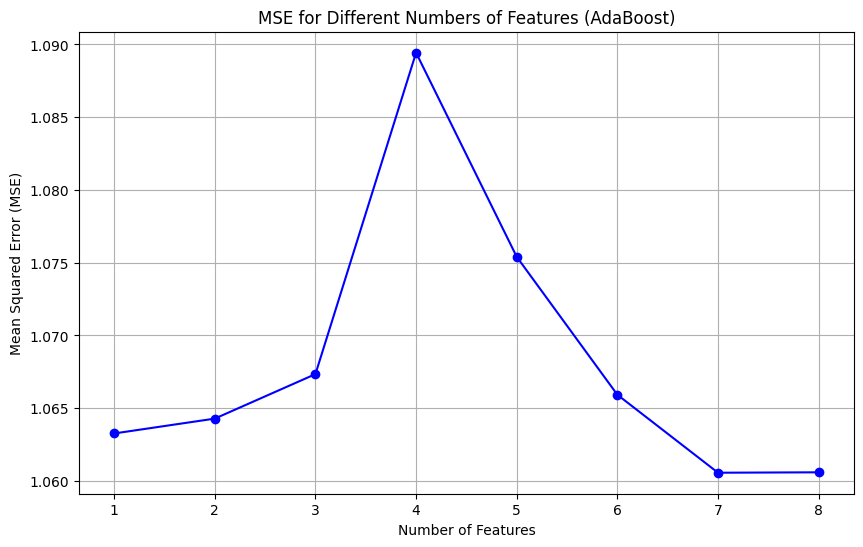

In [ ]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
selected_features = feature_importance_df['Feature'].head(8).tolist()
mse_scores_per_k = []
for k in range(1, len(selected_features) + 1):
    ada_reg_selected = AdaBoostRegressor(n_estimators=100, learning_rate=0.01, random_state=42)
    mse_scores = cross_val_score(ada_reg_selected, x_train_imputed[selected_features[:k]], y_train, scoring='neg_mean_squared_error', cv=5)
    mse_scores_per_k.append(-np.mean(mse_scores))

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(selected_features) + 1), mse_scores_per_k, marker='o', linestyle='-', color='b')
plt.title('MSE for Different Numbers of Features (AdaBoost)')
plt.xlabel('Number of Features')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

In [ ]:
param_grid = {
    'learning_rate': [0.0001, 0.005, 0.05, 0.1, 0.001, 0.01],
    'n_estimators': [50, 100, 150, 200, 250, 300]
}

random_search = RandomizedSearchCV(
    AdaBoostRegressor(random_state=42),
    param_distributions=param_grid,
    n_iter=100,
    scoring='neg_mean_squared_error',
    cv=5,
    random_state=42,
    n_jobs=-1
)

random_search.fit(x_train_imputed[selected_features], y_train)

print("Best Parameters:", random_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 36 is smaller than n_iter=100. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Parameters: {'n_estimators': 300, 'learning_rate': 0.005}


In [ ]:
ada_best = AdaBoostRegressor(n_estimators=300, learning_rate=0.05, random_state=42)
ada_best.fit(x_train_imputed, y_train.values.ravel())

AdaBoostRegressor(learning_rate=0.05, n_estimators=300, random_state=42)

In [49]:
ada_best = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3), n_estimators=300,learning_rate=0.05,random_state=42)


In [50]:
top_features = feature_importance_df.head(8)['Feature'].tolist()
y_pred_cv = cross_val_predict(ada_best, x_train_imputed[top_features], y_train, cv=5)
def spearman_corr_scorer(y_true, y_pred):
    spearman_corr, _ = spearmanr(y_pred, y_true)
    return spearman_corr
spearman_corr_cv = spearman_corr_scorer(y_train, y_pred_cv)
print(f'Average Spearman Correlation: {spearman_corr_cv}')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarnin

Average Spearman Correlation: 0.10818625012913036
